In [1]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [3]:
import pandas as pd
import numpy as np

# Recreating the DataFrame from existing X and y variables
# Assuming X contains features and y contains the target variable
df = pd.concat([X, y], axis=1)

# Renaming columns to match the variable names used in the original code
df = df.rename(columns={
    'trestbps': 'resting_bp',
    'chol': 'cholesterol',
    'thalach': 'max_heart_rate',
    'fbs': 'fasting_bs',
    'cp': 'chest_pain_type',
    'restecg': 'ecg_result',
    'exang': 'exercise_angina',
    'ca': 'num_major_vessels',
    'num': 'target'
})

# Variables quantitatives
quant_vars = ['age', 'resting_bp', 'cholesterol', 'max_heart_rate']

# Statistiques descriptives pour variables quantitatives
desc_stats = df[quant_vars].describe()
medians = df[quant_vars].median()
print("Statistiques descriptives (moyenne, std, min, max, quartiles) :\n", desc_stats)
print("\nMédianes :\n", medians)

# Variables catégorielles
cat_vars = ['sex', 'fasting_bs', 'chest_pain_type', 'ecg_result', 'exercise_angina', 'num_major_vessels', 'thal']

# Distribution des catégories (effectifs et pourcentages)
for var in cat_vars:
    print(f"\nDistribution de {var} :")
    print(df[var].value_counts())
    print(df[var].value_counts(normalize=True) * 100)

# Prévalence de la maladie cardiaque (target binaire)
print("\nPrévalence maladie cardiaque (cible) en pourcentage :")
print(df['target'].value_counts(normalize=True) * 100)

# Valeurs manquantes
print("\nNombre de valeurs manquantes par variable :")
print(df.isnull().sum())

# Matrice de corrélation entre variables quantitatives et cible
corr = df[quant_vars + ['target']].corr()
print("\nMatrice de corrélation :")
print(corr)

Statistiques descriptives (moyenne, std, min, max, quartiles) :
               age  resting_bp  cholesterol  max_heart_rate
count  303.000000  303.000000   303.000000      303.000000
mean    54.438944  131.689769   246.693069      149.607261
std      9.038662   17.599748    51.776918       22.875003
min     29.000000   94.000000   126.000000       71.000000
25%     48.000000  120.000000   211.000000      133.500000
50%     56.000000  130.000000   241.000000      153.000000
75%     61.000000  140.000000   275.000000      166.000000
max     77.000000  200.000000   564.000000      202.000000

Médianes :
 age                56.0
resting_bp        130.0
cholesterol       241.0
max_heart_rate    153.0
dtype: float64

Distribution de sex :
sex
1    206
0     97
Name: count, dtype: int64
sex
1    67.986799
0    32.013201
Name: proportion, dtype: float64

Distribution de fasting_bs :
fasting_bs
0    258
1     45
Name: count, dtype: int64
fasting_bs
0    85.148515
1    14.851485
Name: proportion

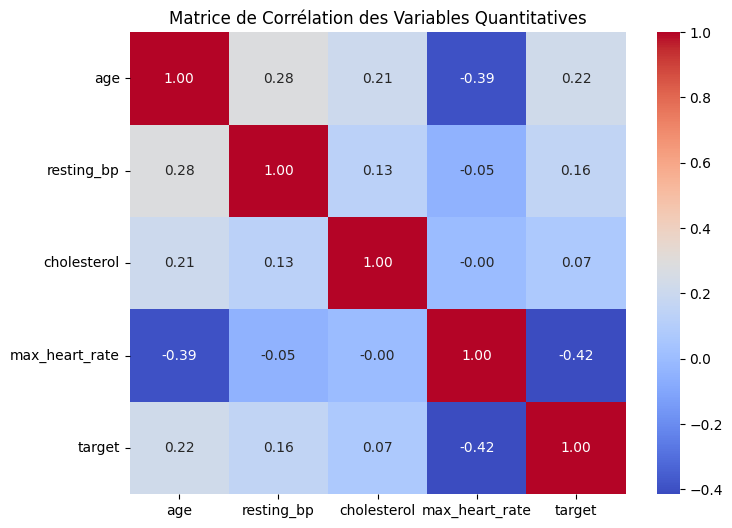

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation des Variables Quantitatives')
plt.show()

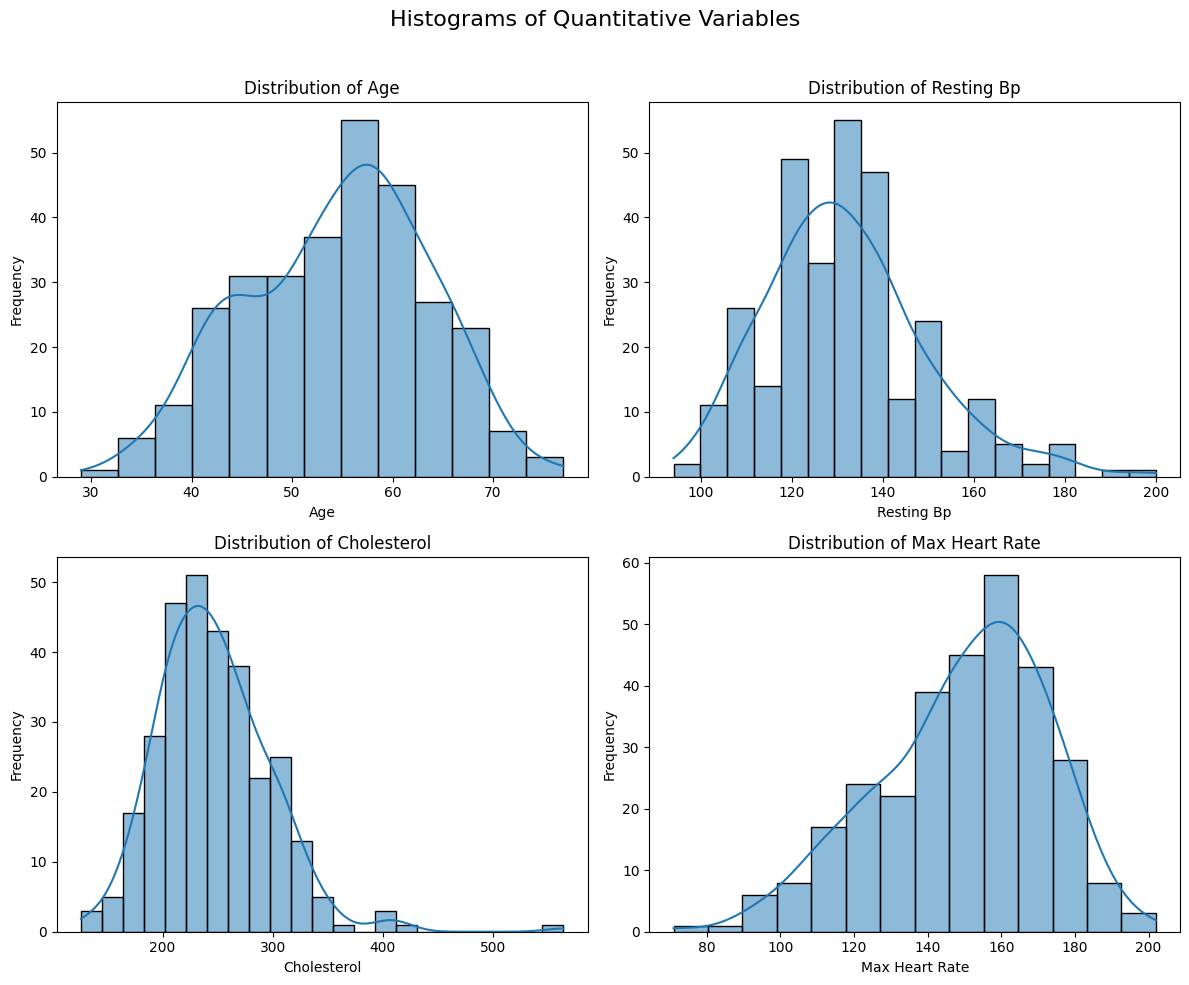

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Recreating the DataFrame from existing X and y variables (assuming X and y are available from previous cells)
df = pd.concat([X, y], axis=1)

# Renaming columns to match the variable names used in the original code
df = df.rename(columns={
    'trestbps': 'resting_bp',
    'chol': 'cholesterol',
    'thalach': 'max_heart_rate',
    'fbs': 'fasting_bs',
    'cp': 'chest_pain_type',
    'restecg': 'ecg_result',
    'exang': 'exercise_angina',
    'ca': 'num_major_vessels',
    'num': 'target'
})

# Define the quantitative variables as per instruction
quant_vars = ['age', 'resting_bp', 'cholesterol', 'max_heart_rate']

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten() # Flatten the 2x2 array of axes for easy iteration

# Iterate through the quant_vars list and the created axes to plot histograms
for i, variable in enumerate(quant_vars):
    sns.histplot(data=df, x=variable, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {variable.replace("_", " ").title()}') # Set title for each subplot
    axes[i].set_xlabel(variable.replace("_", " ").title()) # Set x-axis label
    axes[i].set_ylabel('Frequency') # Set y-axis label

# Add an overall title to the figure
plt.suptitle('Histograms of Quantitative Variables', fontsize=16)

# Adjust subplot parameters for a tight layout
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust rect to prevent suptitle overlap

# Display the plots
plt.show()

## Generate Bar Plots for Categorical Variables

### Subtask:
Create bar plots for categorical variables (sex, fasting_bs, chest_pain_type, ecg_result, exercise_angina, num_major_vessels, thal) to visualize their frequency distributions.


**Reasoning**:
I need to generate bar plots for the specified categorical variables. I will define the list of categorical variables, determine an appropriate grid size for the subplots, and then iterate through each variable to create a bar plot using `seaborn.countplot()`, setting appropriate titles and labels for each plot and the overall figure.



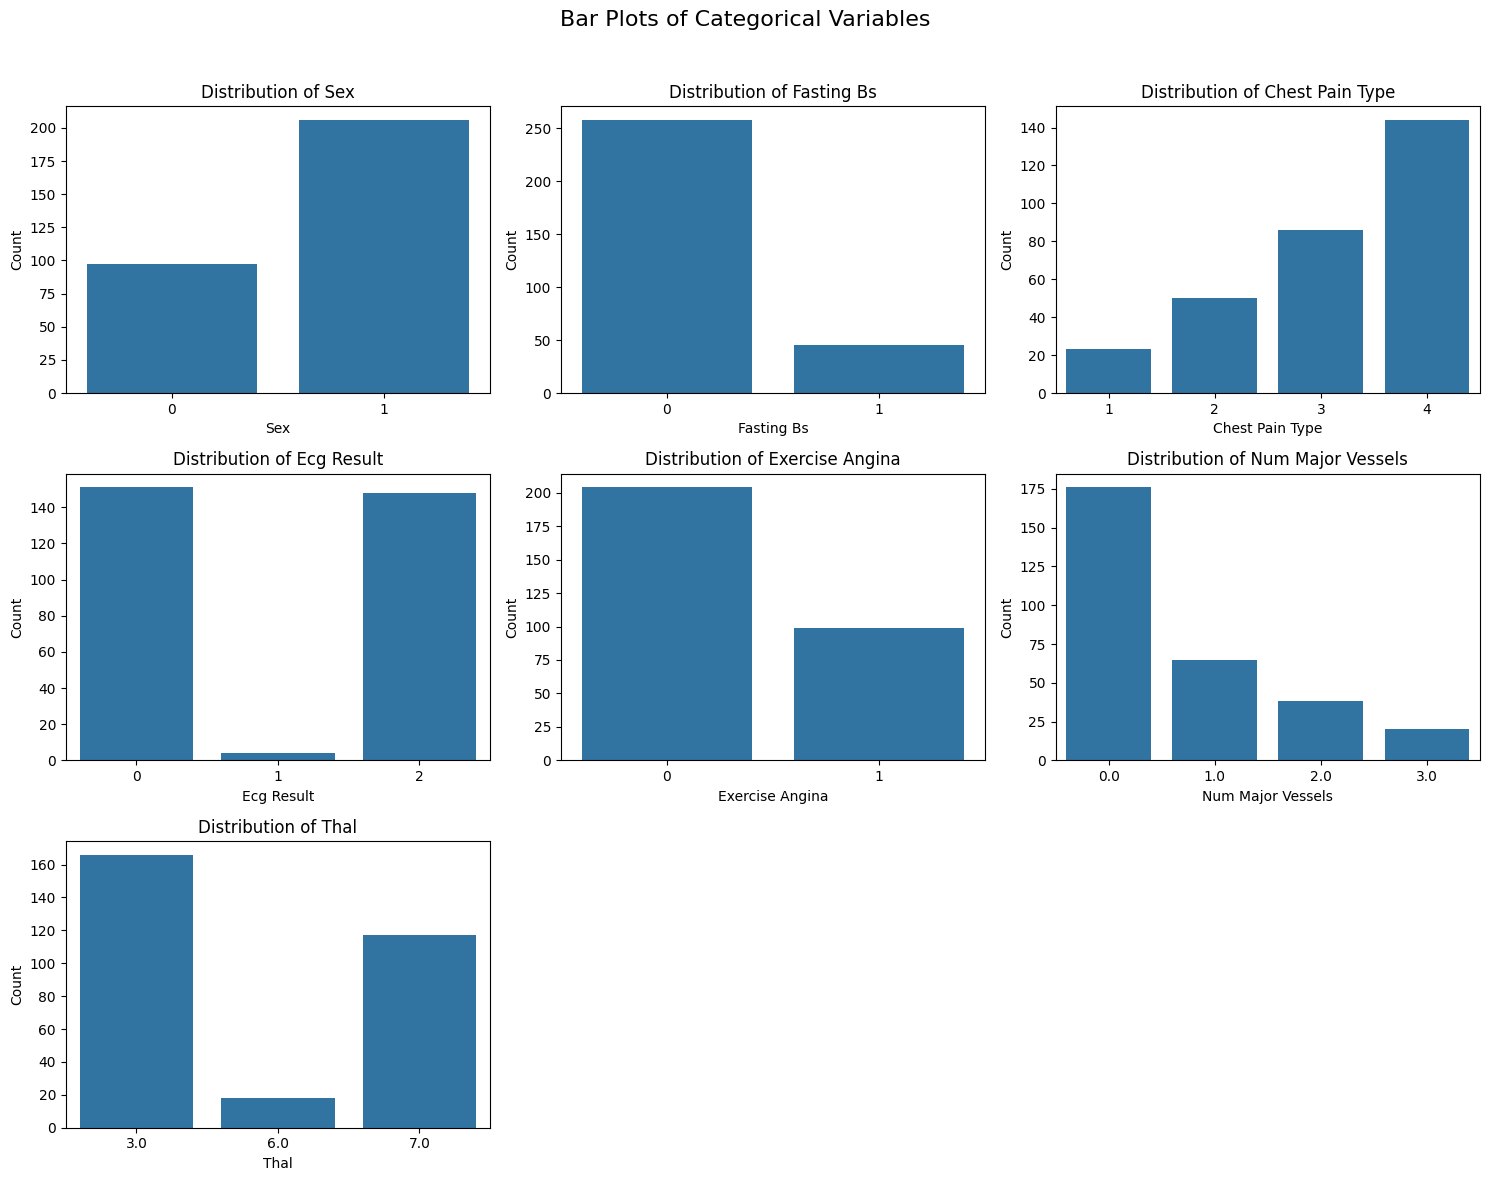

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the categorical variables as per instruction
cat_vars = ['sex', 'fasting_bs', 'chest_pain_type', 'ecg_result', 'exercise_angina', 'num_major_vessels', 'thal']

# Determine grid size (e.g., 3 rows, 3 columns for 7 variables)
# Calculate optimal rows and columns to accommodate all variables, ensuring no empty plots if possible or minimal empty plots
num_vars = len(cat_vars)
num_cols = 3 # Aim for 3 columns
num_rows = (num_vars + num_cols - 1) // num_cols # Calculate rows needed

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten() # Flatten the array of axes for easy iteration

# Iterate through the cat_vars list and the created axes to plot bar charts
for i, variable in enumerate(cat_vars):
    sns.countplot(data=df, x=variable, ax=axes[i])
    axes[i].set_title(f'Distribution of {variable.replace("_", " ").title()}') # Set title for each subplot
    axes[i].set_xlabel(variable.replace("_", " ").title()) # Set x-axis label
    axes[i].set_ylabel('Count') # Set y-axis label

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add an overall title to the figure
plt.suptitle('Bar Plots of Categorical Variables', fontsize=16)

# Adjust subplot parameters for a tight layout
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust rect to prevent suptitle overlap

# Display the plots
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Quantitative Variable Distributions**: Histograms with Kernel Density Estimate (KDE) curves were successfully generated for `age`, `resting_bp`, `cholesterol`, and `max_heart_rate`. An initial `NameError` due to an undefined DataFrame `df` was resolved by explicitly recreating the DataFrame from existing `X` and `y` variables and renaming its columns.
*   **Categorical Variable Distributions**: Bar plots illustrating the frequency distributions were successfully generated for `sex`, `fasting_bs`, `chest_pain_type`, `ecg_result`, `exercise_angina`, `num_major_vessels`, and `thal`.

### Insights or Next Steps

*   The generated plots provide a foundational understanding of the distribution of both quantitative and categorical features within the dataset, highlighting potential skewness, ranges, and category imbalances.
*   The next logical step would be to perform bivariate analysis, examining the relationship between these individual features and the target variable to uncover potential predictors for heart disease.
